In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, skew

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

%config InlineBackend.figure_format = 'retina'

ml_accuracies = dict()

 Importing and Initial Analysis

In [17]:
df = pd.read_csv("cancer patient data sets.csv", index_col='index')

df.drop("Patient Id", axis=1, inplace=True)

df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

display(df)

age  gender  air_pollution  alcohol_use  dust_allergy  \
index                                                          
0       33       1              2            4             5   
1       17       1              3            1             5   
2       35       1              4            5             6   
3       37       1              7            7             7   
4       46       1              6            8             7   
...    ...     ...            ...          ...           ...   
995     44       1              6            7             7   
996     37       2              6            8             7   
997     25       2              4            5             6   
998     18       2              6            8             7   
999     47       1              6            5             6   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
index                                                             
0                         4             3                     2   
1                         3             4                     2   
2                         5             5                     4   
3                         7             6                     7   
4                         7             7                     6   
...                     ...           ...                   ...   
995                       7             7                     6   
996                       7             7                     6   
997                       5             5                     4   
998                       7             7                     6   
999                       5             5                     4   

       balanced_diet  obesity  ...  fatigue  weight_loss  shortness_of_breath  \
index                          ...                                              
0                  2        4  ...        3            4                    2   
1                  2        2  ...        1            3                    7   
2                  6        7  ...        8            7                    9   
3                  7        7  ...        4            2                    3   
4                  7        7  ...        3            2                    4   
...              ...      ...  ...      ...          ...                  ...   
995                7        7  ...        5            3                    2   
996                7        7  ...        9            6                    5   
997                6        7  ...        8            7                    9   
998                7        7  ...        3            2                    4   
999                6        7  ...        8            7                    9   

       wheezing  swallowing_difficulty  clubbing_of_finger_nails  \
index                                                              
0             2                      3                         1   
1             8                      6                         2   
2             2                      1                         4   
3             1                      4                         5   
4             1                      4                         2   
...         ...                    ...                       ...   
995           7                      8                         2   
996           7                      2                         4   
997           2                      1                         4   
998           1                      4                         2   
999           2                      1                         4   

       frequent_cold  dry_cough  snoring   level  
index                                             
0                  2          3        4     Low  
1                  1          7        2  Medium  
2                  6          7        2    High  
3                  6          7        5    High  
4                  4          2        3    High  
...   

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air_pollution             1000 non-null   int64 
 3   alcohol_use               1000 non-null   int64 
 4   dust_allergy              1000 non-null   int64 
 5   occupational_hazards      1000 non-null   int64 
 6   genetic_risk              1000 non-null   int64 
 7   chronic_lung_disease      1000 non-null   int64 
 8   balanced_diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive_smoker            1000 non-null   int64 
 12  chest_pain                1000 non-null   int64 
 13  coughing_of_blood         1000 non-null   int64 
 14  fatigue                   1000

In [19]:
print('Cancer Levels: ', df['level'].unique())

mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df["level"].replace(mapping, inplace=True)
print('Cancer Levels: ', df['level'].unique())

Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]


In [32]:
round(df.describe().iloc[1:, ].T, 3).style.format(precision=3).background_gradient(axis=1)


In [21]:
X = df.drop(columns='level')
y = df.level

display(X.head())
print(y[:5])

age  gender  air_pollution  alcohol_use  dust_allergy  \
index                                                          
0       33       1              2            4             5   
1       17       1              3            1             5   
2       35       1              4            5             6   
3       37       1              7            7             7   
4       46       1              6            8             7   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
index                                                             
0                         4             3                     2   
1                         3             4                     2   
2                         5             5                     4   
3                         7             6                     7   
4                         7             7                     6   

       balanced_diet  obesity  ...  coughing_of_blood  fatigue  weight_loss  \
index                          ...                                            
0                  2        4  ...                  4        3            4   
1                  2        2  ...                  3        1            3   
2                  6        7  ...                  8        8            7   
3                  7        7  ...                  8        4            2   
4                  7        7  ...                  9        3            2   

       shortness_of_breath  wheezing  swallowing_difficulty  \
index                                                         
0                        2         2                      3   
1                        7         8                      6   
2                        9         2                      1   
3                        3         1                      4   
4                        4         1                      4   

       clubbing_of_finger_nails  frequent_cold  dry_cough  snoring  
index                                                               
0                             1              2          3        4  
1                             2              1          7        2  
2                             4              6          7        2  
3                             5              6          7        5  
4                             2              4          2        3  

[5 rows x 23 columns]

index
0    0
1    1
2    2
3    2
4    2
Name: level, dtype: int64


Data Visualization

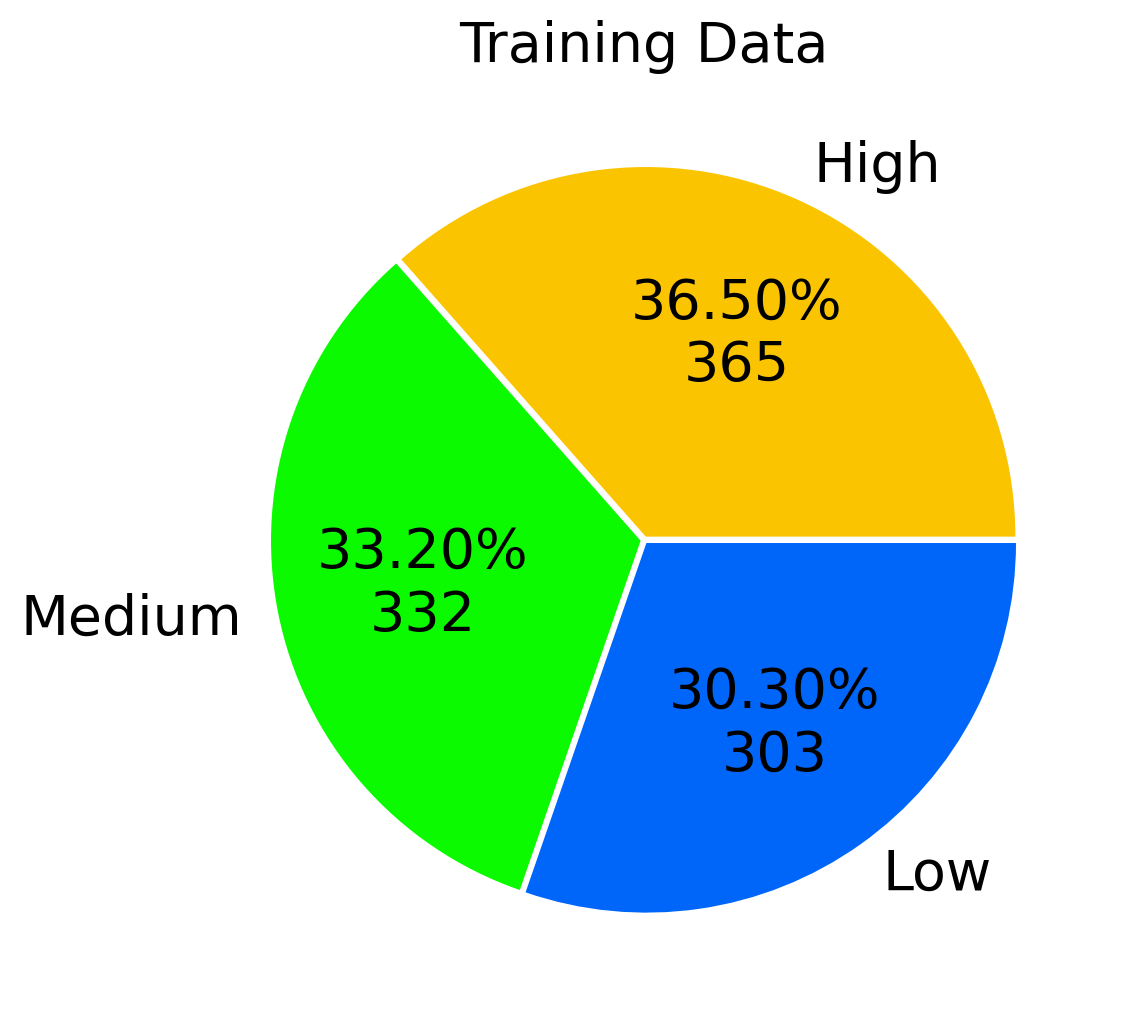

In [22]:
plt.figure(figsize=(6, 6))
plt.title('Training Data', fontsize=20)
plt.pie(df.level.value_counts(),
    labels=mapping.keys(),
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(df.level.value_counts() /100)),
    explode=tuple(0.01 for i in range(3)),
    textprops={'fontsize': 20}
)
plt.show()

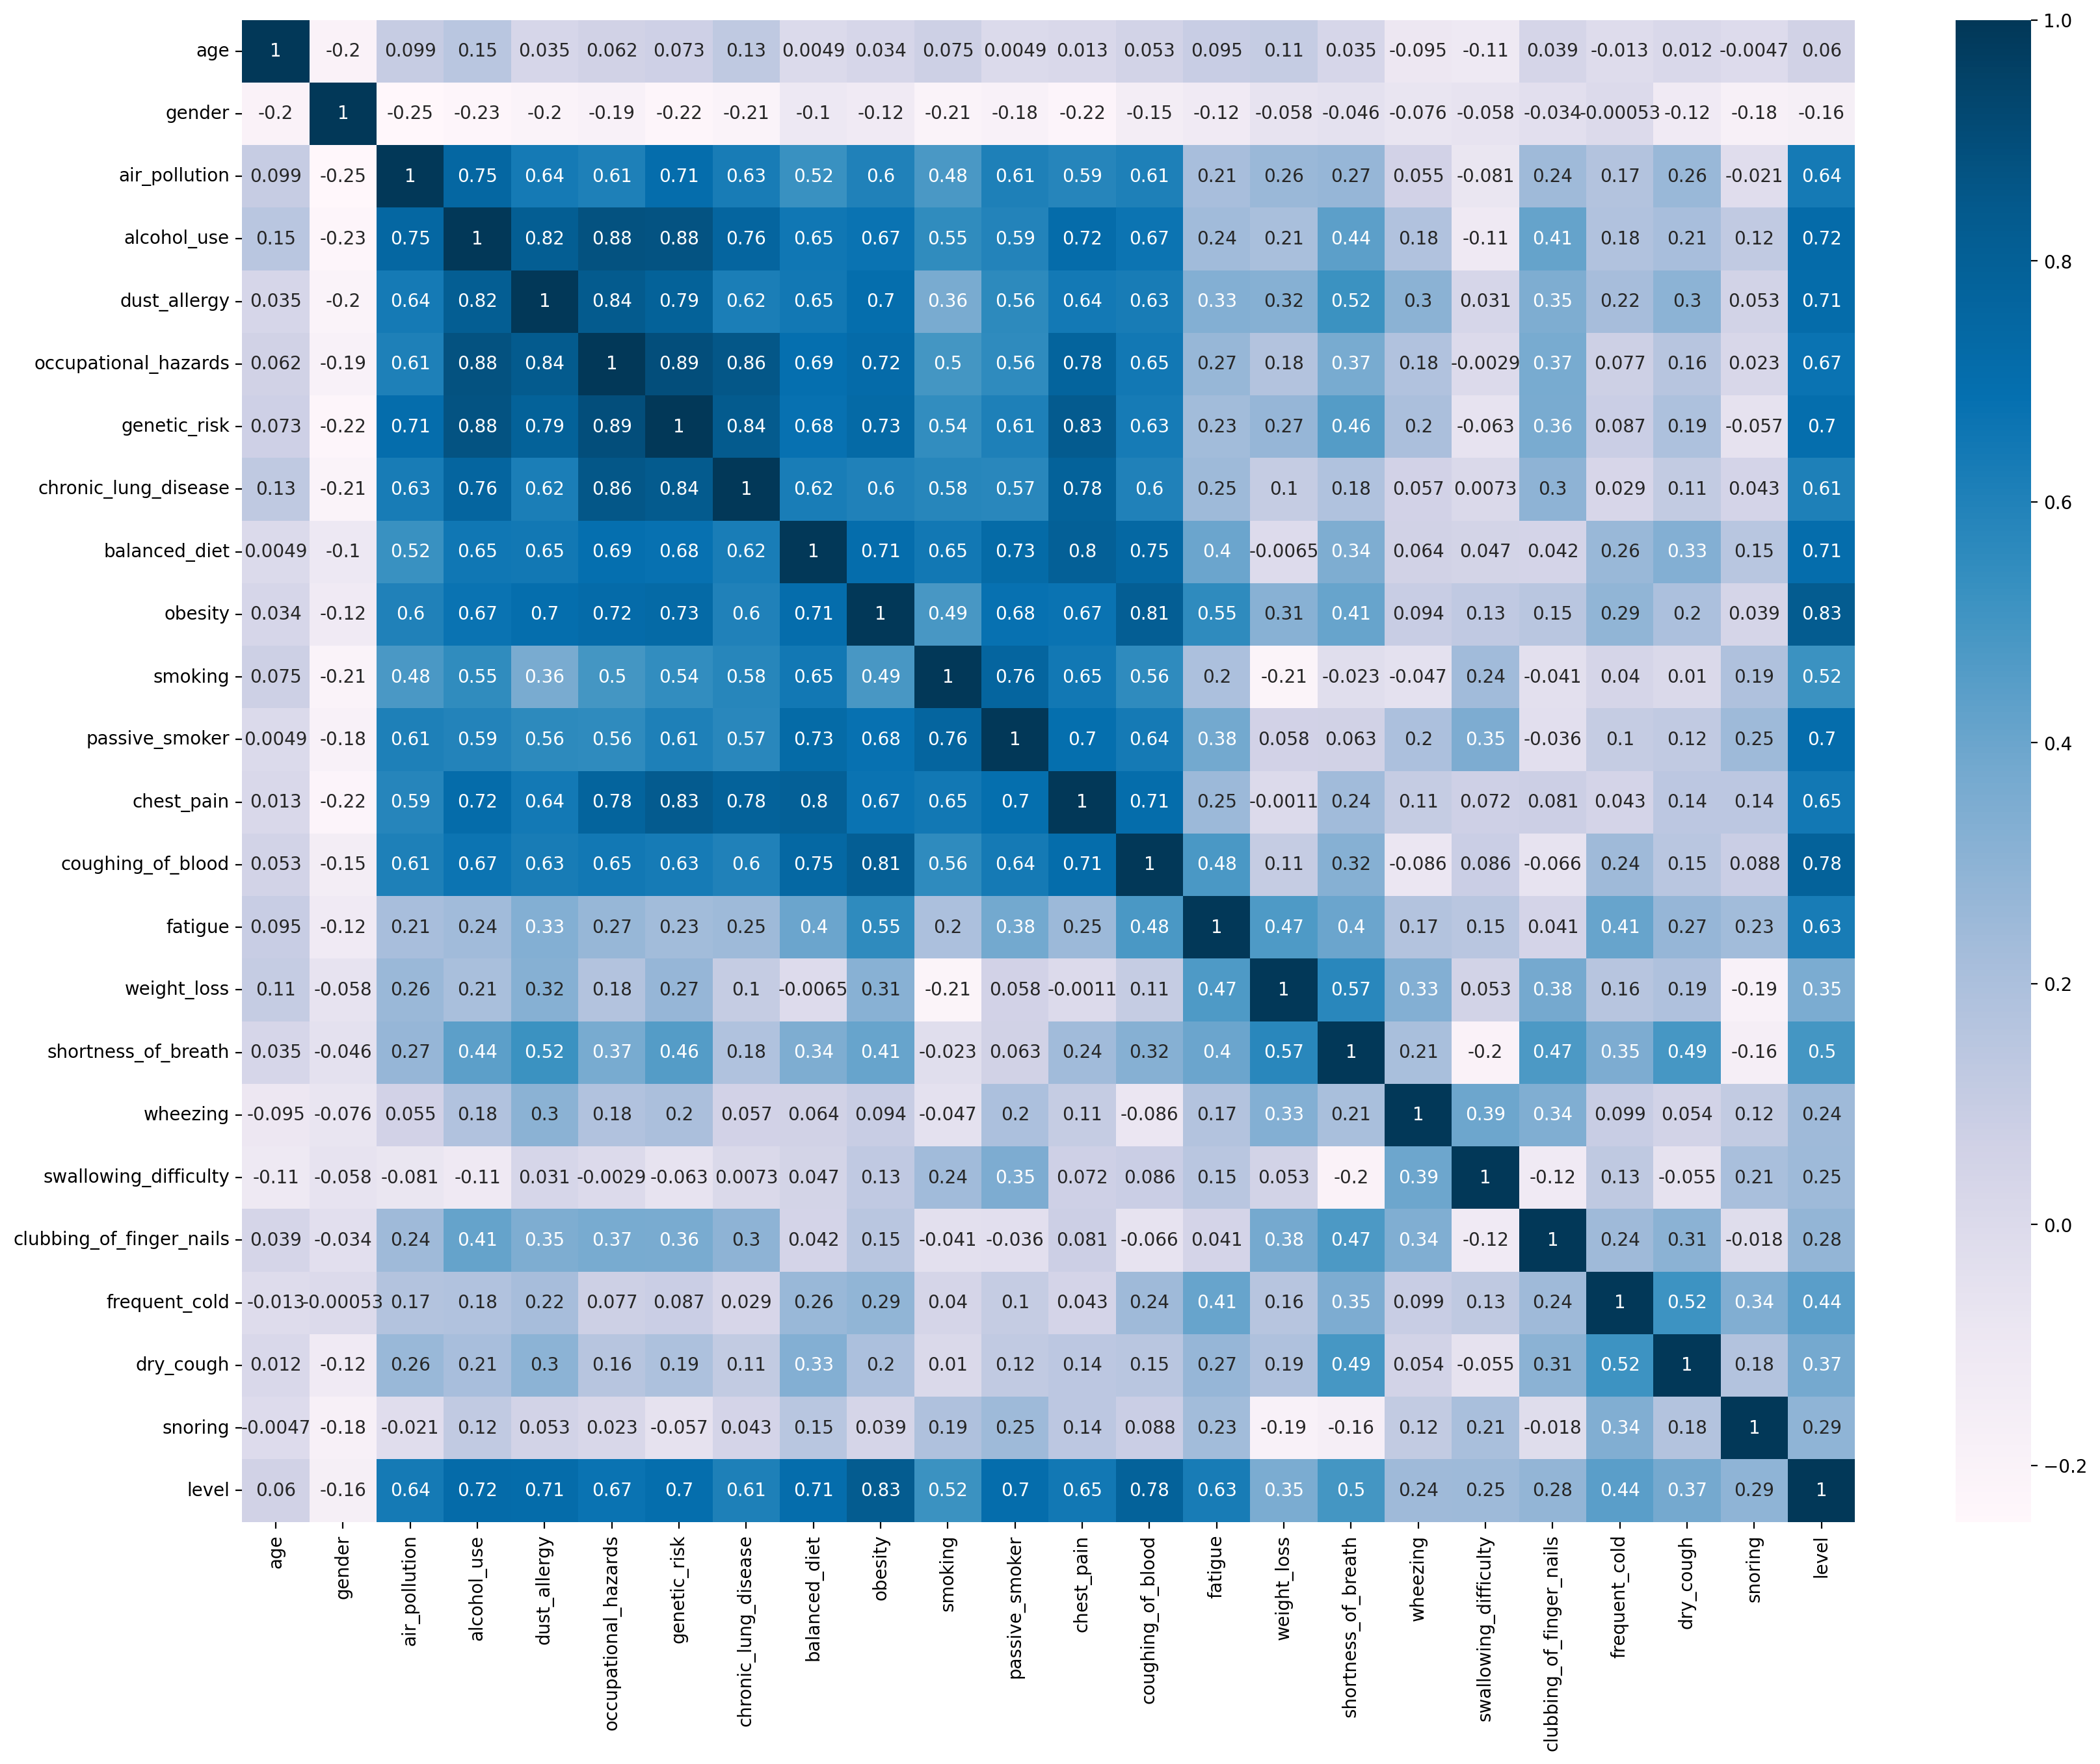

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

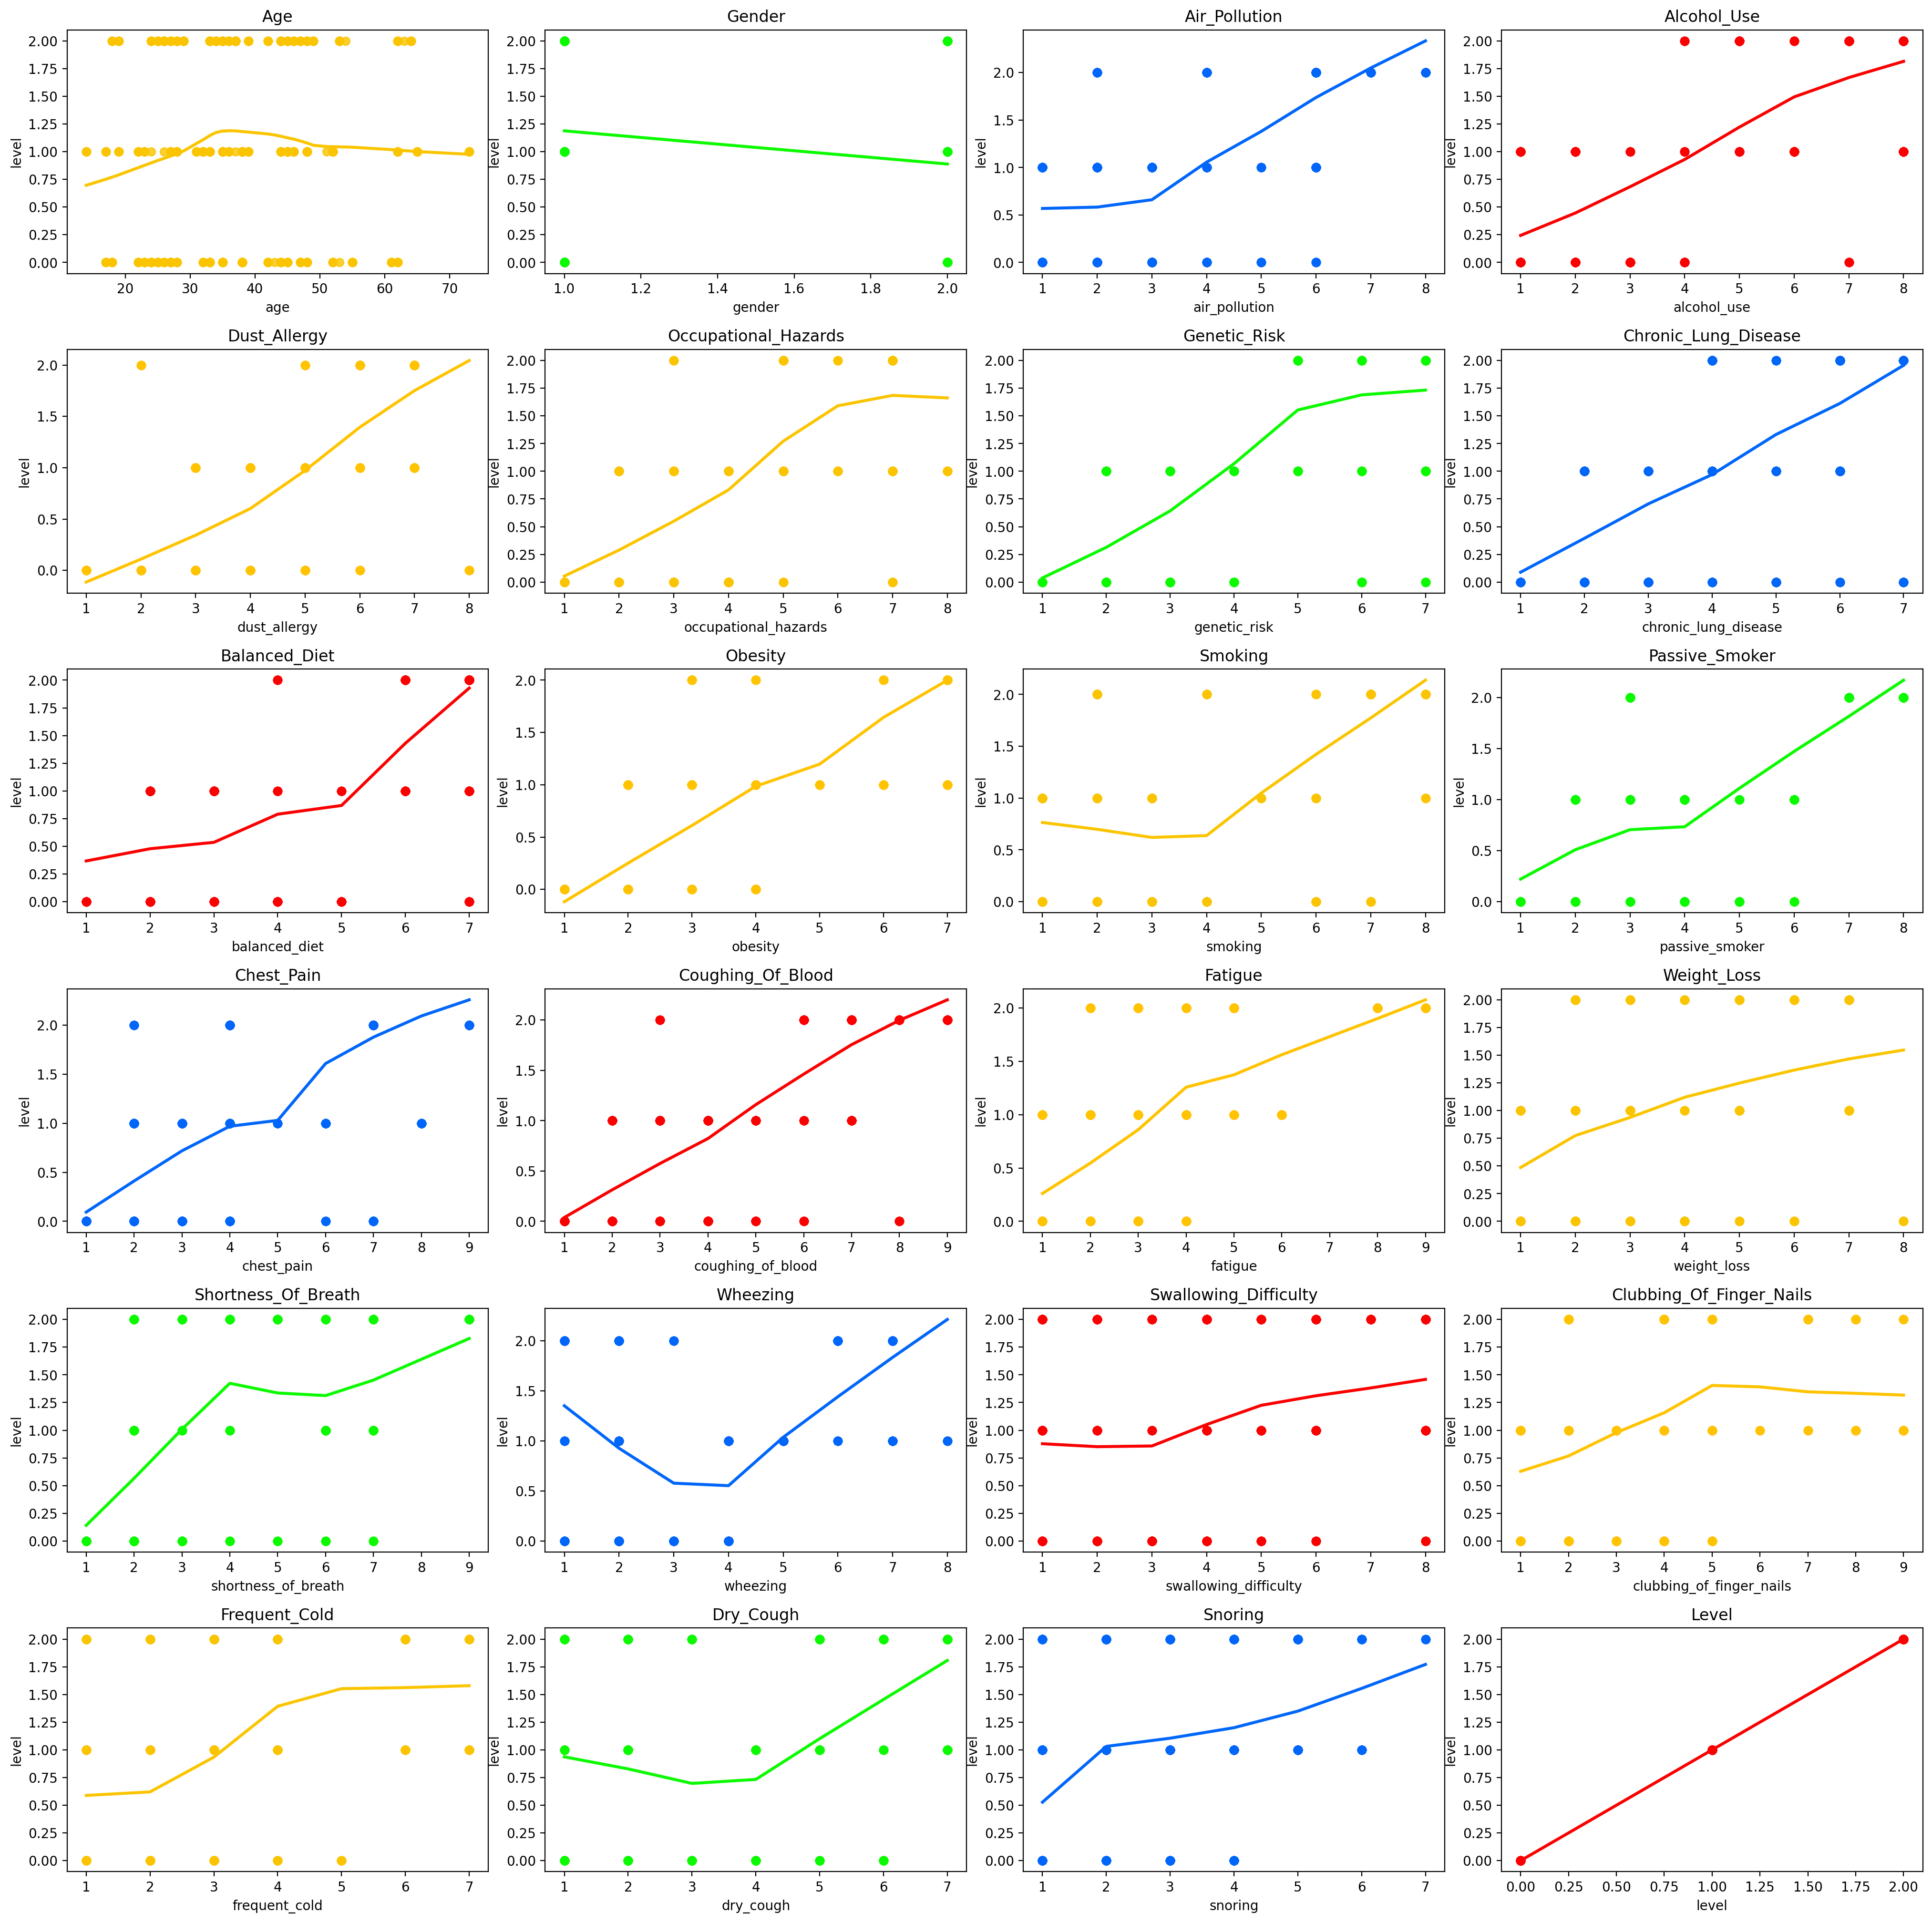

In [24]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

colors = ['#FAC500','#0BFA00', '#0066FA','#FA0000', '#FFC300']

for i, col in enumerate(df.columns):

    sns.regplot(x=col, y='level', data=df, lowess=True, color=colors[i % len(colors)], ax=ax[i])
    ax[i].set_title(col.title())

plt.tight_layout(pad=0.1, w_pad=0.6, h_pad=1)
plt.show()

<ipython-input-33-5b86409625a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['level'].replace(dict(zip(mapping.values(), mapping.keys()))),
<ipython-input-33-5b86409625a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['level'].replace(dict(zip(mapping.values(), mapping.keys()))),
<ipython-input-33-5b86409625a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['level'].replace(dict(zip(mapping.values(), mapping.keys()))),
<ipython-input-33-5b86409625a4>:5: FutureWarning: 

Passing `palette` without assigning `hu

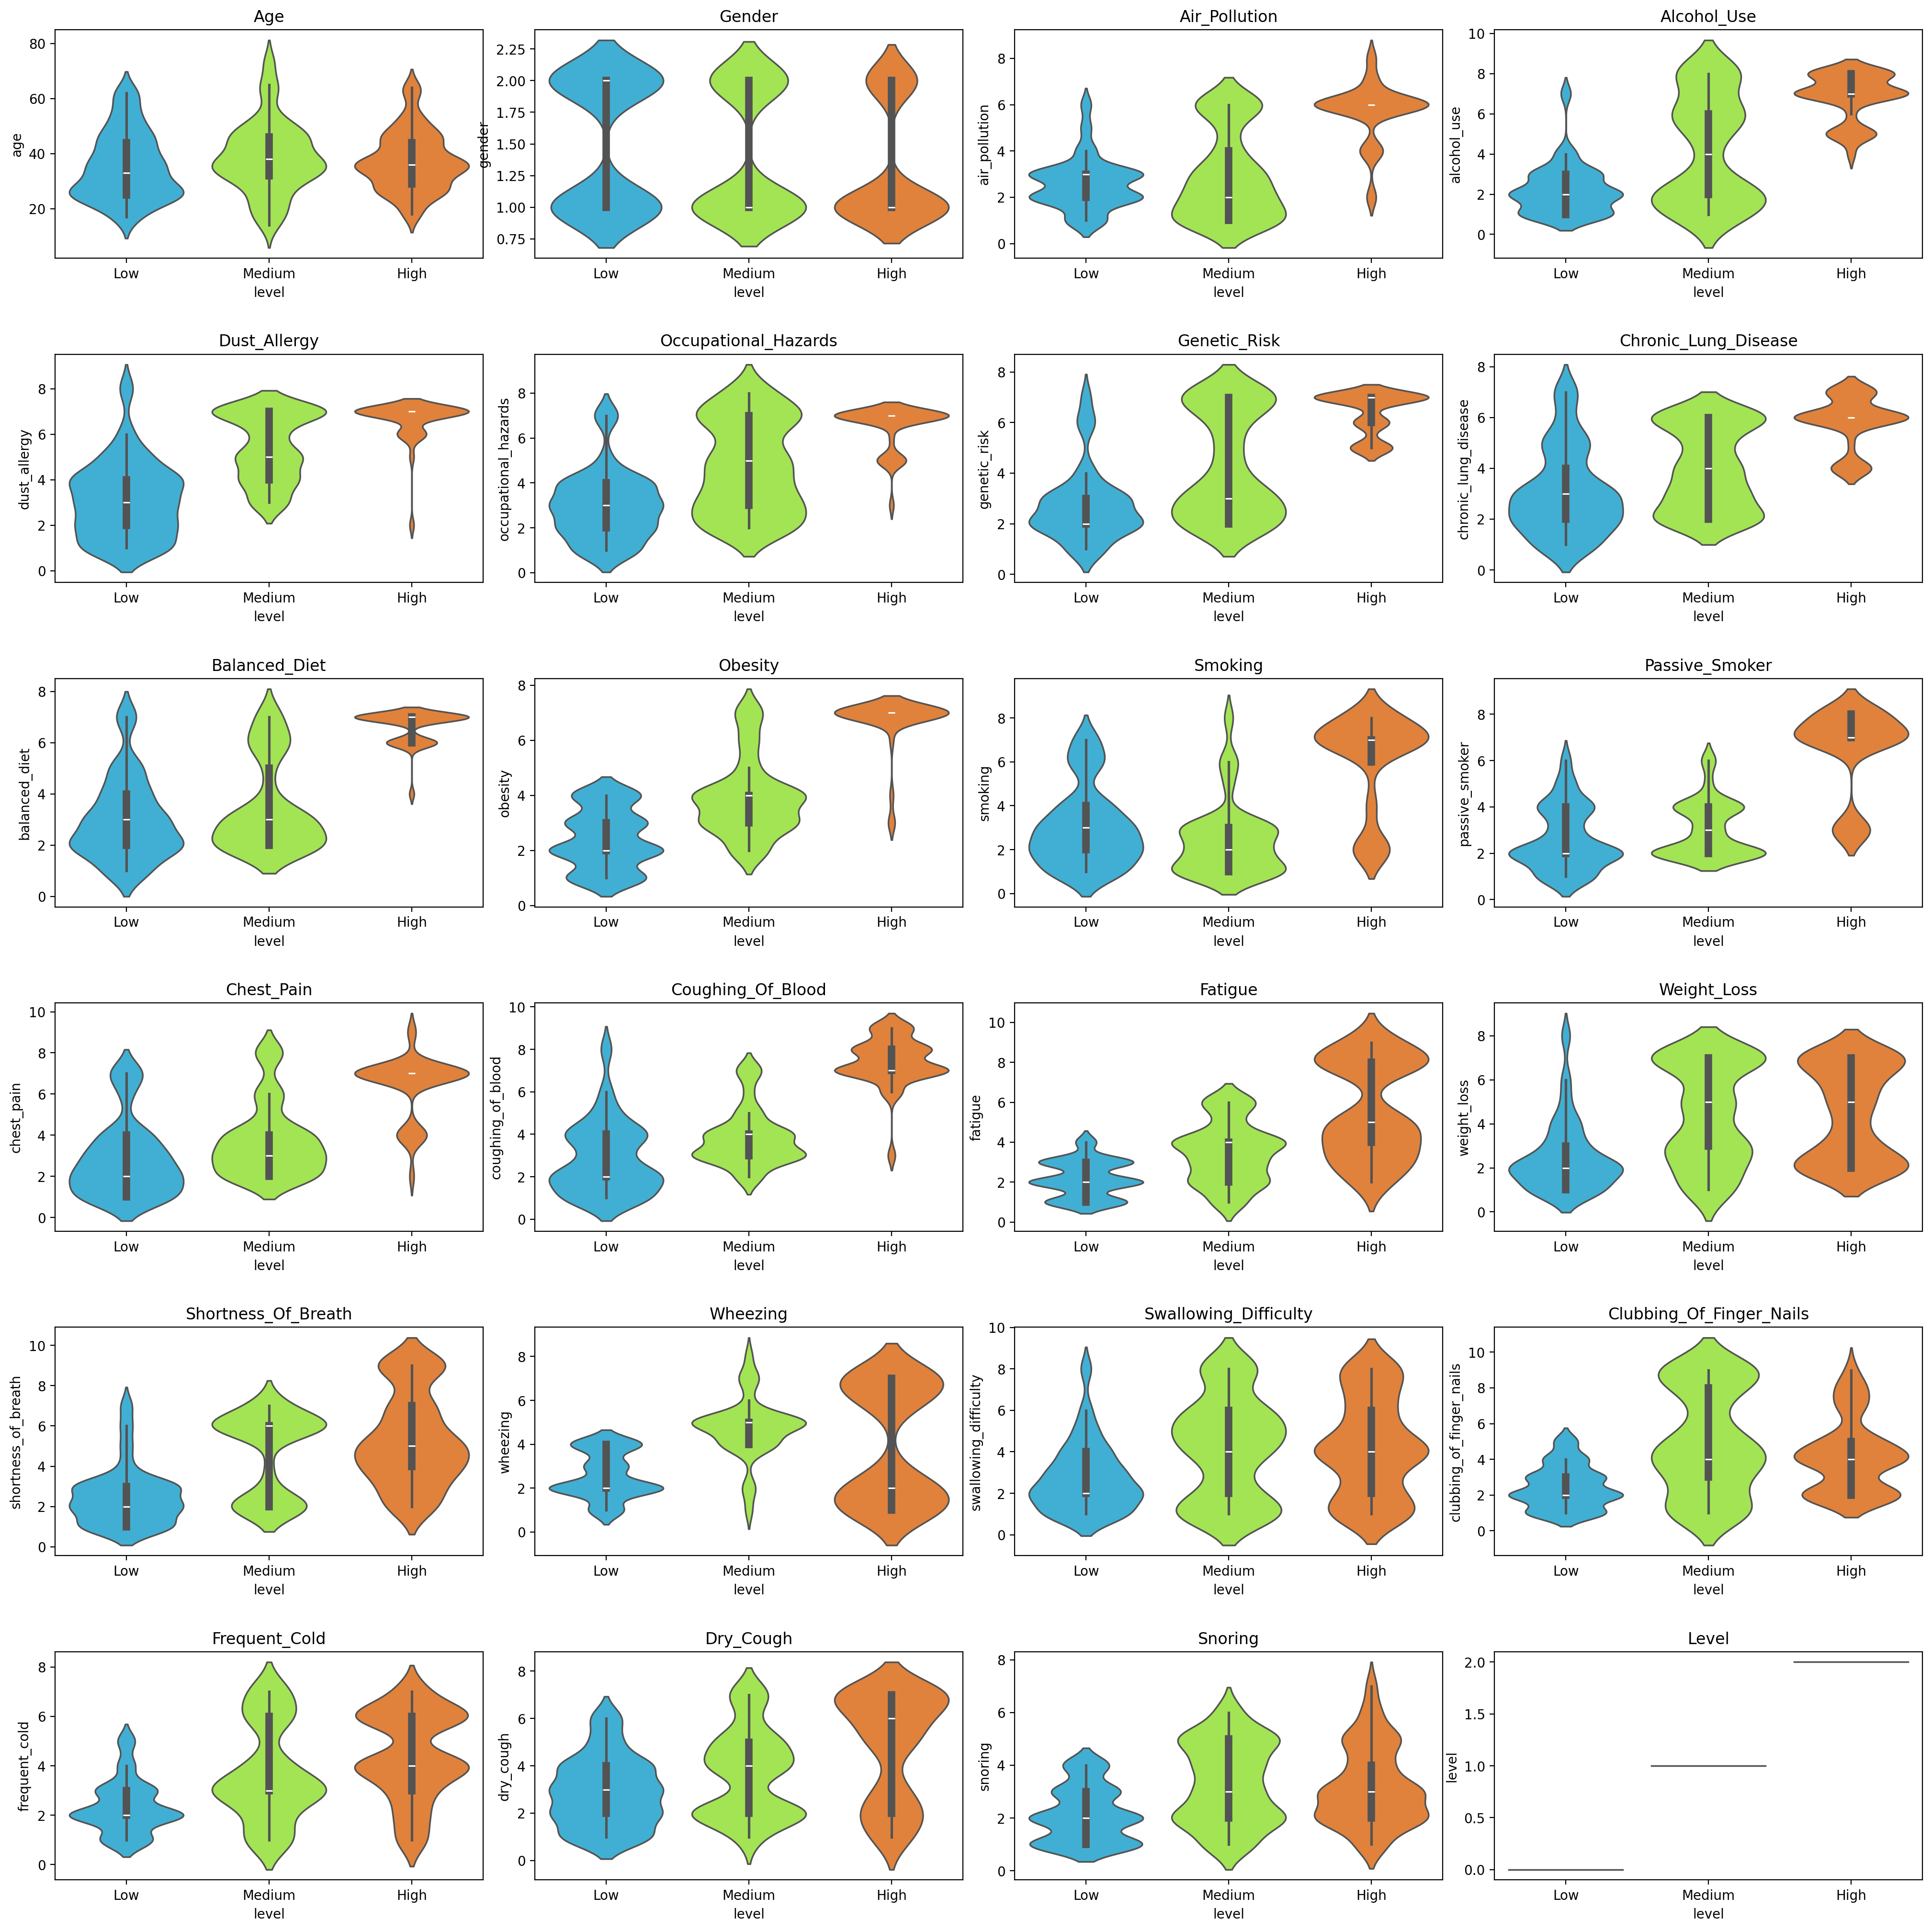

In [33]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.violinplot(x=df['level'].replace(dict(zip(mapping.values(), mapping.keys()))),
                   y=col, data=df, hue_order='level', palette='turbo', ax=ax[i])
    ax[i].set_title(col.title())

plt.tight_layout(pad=0.1, w_pad=0.2, h_pad=2.5)
plt.show()

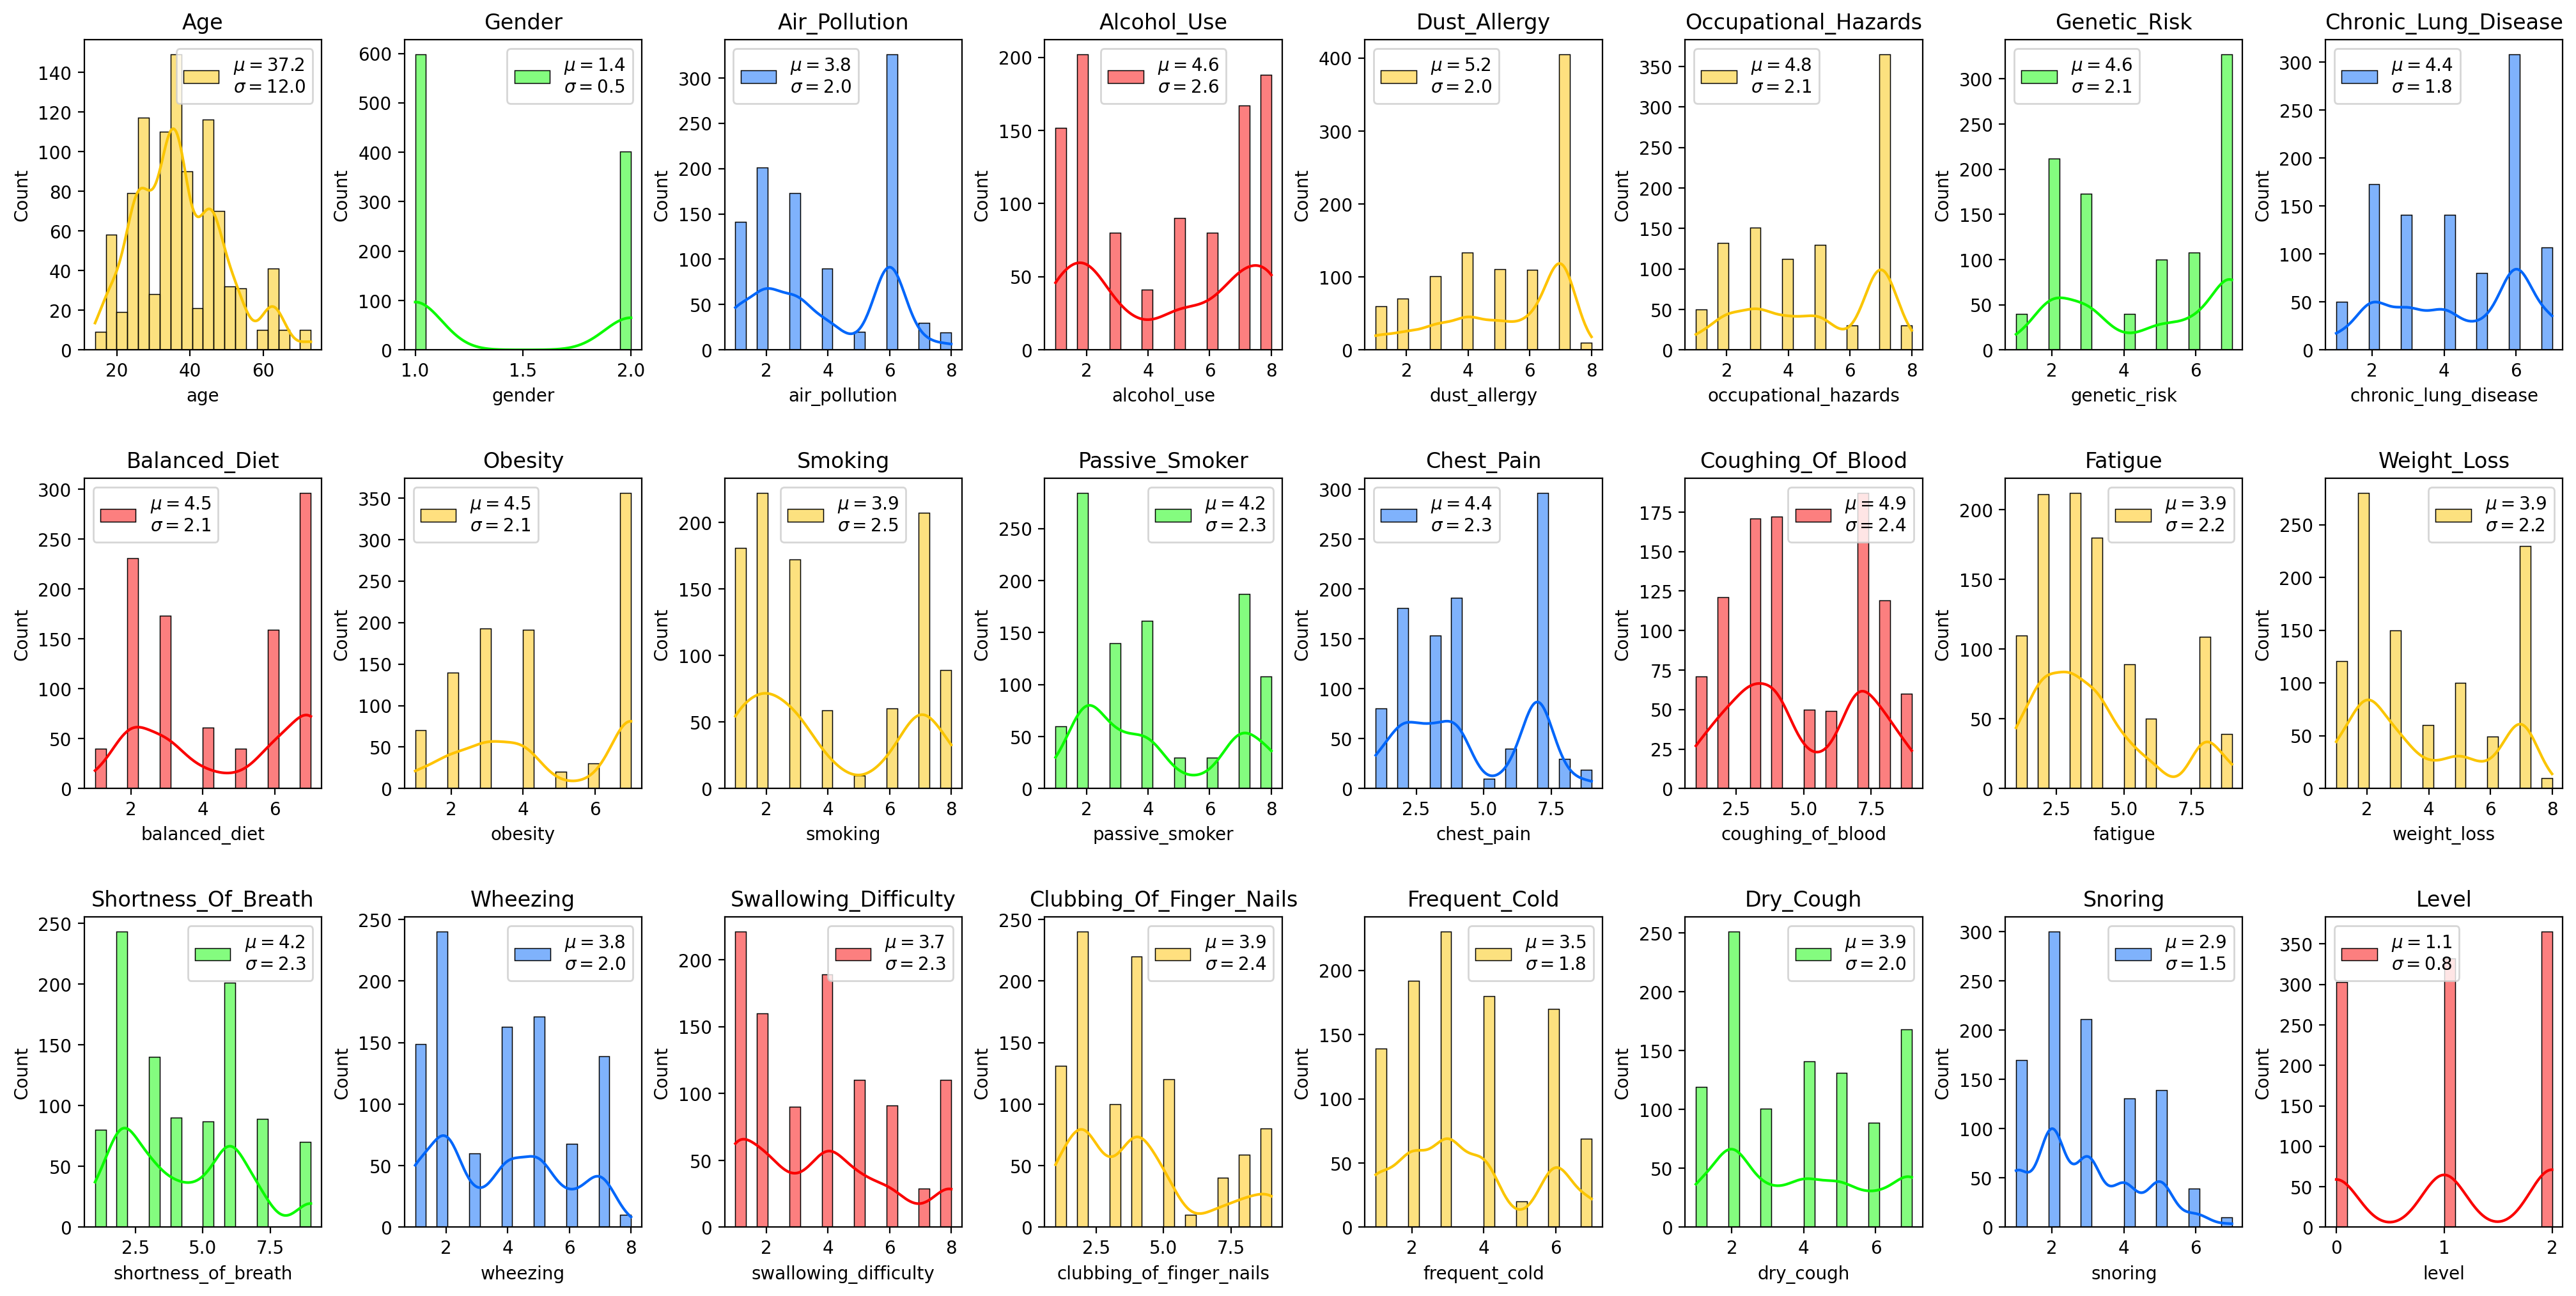

In [34]:
fig, ax = plt.subplots(ncols=8, nrows=3, figsize=(20, 10))
ax = ax.flatten()
i = 0

colors = ['#FAC500','#0BFA00', '#0066FA','#FA0000', '#FFC300']

for k, v in df.items():
    mu, sigma = norm.fit(v)
    sns.histplot(v,
                 kde=True,
                 bins=20,
                 color=colors[i % len(colors)],
                 ax=ax[i],
                 label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')
    ax[i].set_title(f'{k.title()}')
    ax[i].legend()
    i += 1

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
plt.show()

Training Testing Splitting

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

print(f'\nTraining output counts\n{y_train.value_counts()}')

Shapes - X Training: (700, 23) and X Testing (300, 23)
Shapes - Y Training: (700,) and Y Testing (300,)

Training output counts
level
2    248
1    233
0    219
Name: count, dtype: int64


 Multinomial Logistic Regression

In [36]:

MR = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=40)

MR.fit(X_train, y_train)

MR_pred = MR.predict(X_test)

print('Intercept: \n', MR.intercept_)
print('Coefficients: \n', MR.coef_)

Intercept: 
 [ 36.71653269  -0.45263894 -36.26389376]
Coefficients: 
 [[-0.0367973   0.0786932  -0.14372962 -0.41359046 -0.28471346  0.032287
  -0.46931974 -0.2187846  -0.03310826 -1.01589426 -0.02799406 -0.91213601
   0.28618906 -0.83419616 -0.74981672  0.03597805 -0.23744814 -0.90156998
  -0.80134823 -0.77615906 -0.64110168 -0.52194223 -0.69789995]
 [ 0.0425299  -0.14197571 -0.32682613 -0.19289119  0.41656286 -0.0279183
   0.22965983 -0.13945161 -0.30280957  0.52073041 -0.08855363  0.10990679
  -0.35243245 -0.00560174 -0.09404005 -0.4179296  -0.24251014  0.72503393
  -0.04126725  0.33984142  0.2108923   0.13029072  0.41266319]
 [-0.00573261  0.0632825   0.47055574  0.60648166 -0.13184941 -0.0043687
   0.23965991  0.35823622  0.33591783  0.49516385  0.11654769  0.80222922
   0.06624339  0.8397979   0.84385677  0.38195155  0.47995829  0.17653604
   0.84261548  0.43631764  0.43020938  0.39165151  0.28523676]]


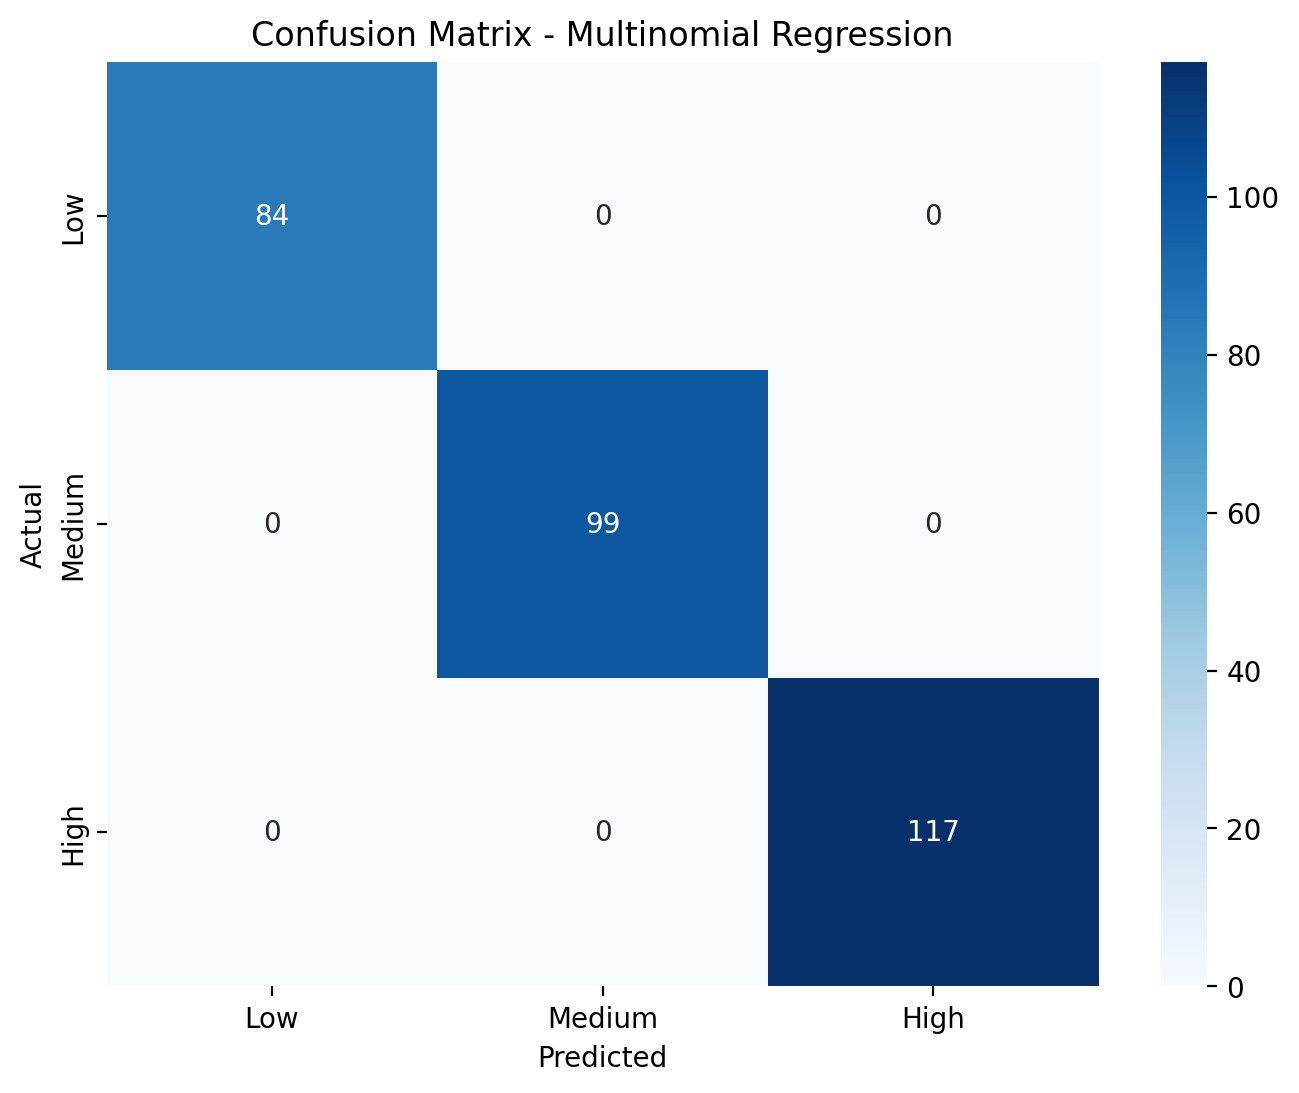

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [38]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def CM(y_true, y_pred, col_names, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=col_names, yticklabels=col_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix ' + title)
    plt.show()

CM(y_test, MR_pred, col_names=['Low', 'Medium', 'High'], title='- Multinomial Regression')

ml_accuracies['Multinomial Model'] = accuracy_score(y_test, MR_pred)
print(classification_report(y_test, MR_pred))

Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
random_forest_n_best(X_train, y_train, X_test, y_test, n_list=np.arange(1,20,1))

Accuracy with 1 estimators: 1.0
Accuracy with 2 estimators: 0.9966666666666667
Accuracy with 3 estimators: 1.0
Accuracy with 4 estimators: 1.0
Accuracy with 5 estimators: 1.0
Accuracy with 6 estimators: 1.0
Accuracy with 7 estimators: 1.0
Accuracy with 8 estimators: 1.0
Accuracy with 9 estimators: 1.0
Accuracy with 10 estimators: 1.0
Accuracy with 11 estimators: 1.0
Accuracy with 12 estimators: 1.0
Accuracy with 13 estimators: 1.0
Accuracy with 14 estimators: 1.0
Accuracy with 15 estimators: 1.0
Accuracy with 16 estimators: 1.0
Accuracy with 17 estimators: 1.0
Accuracy with 18 estimators: 1.0
Accuracy with 19 estimators: 1.0


In [64]:
RF = RandomForestClassifier(n_estimators=3, random_state=40)

RF.fit(X_train, y_train)

RF_pred = RF.predict(X_test)
pd.Series(RF_pred).value_counts()

2    117
1     99
0     84
Name: count, dtype: int64

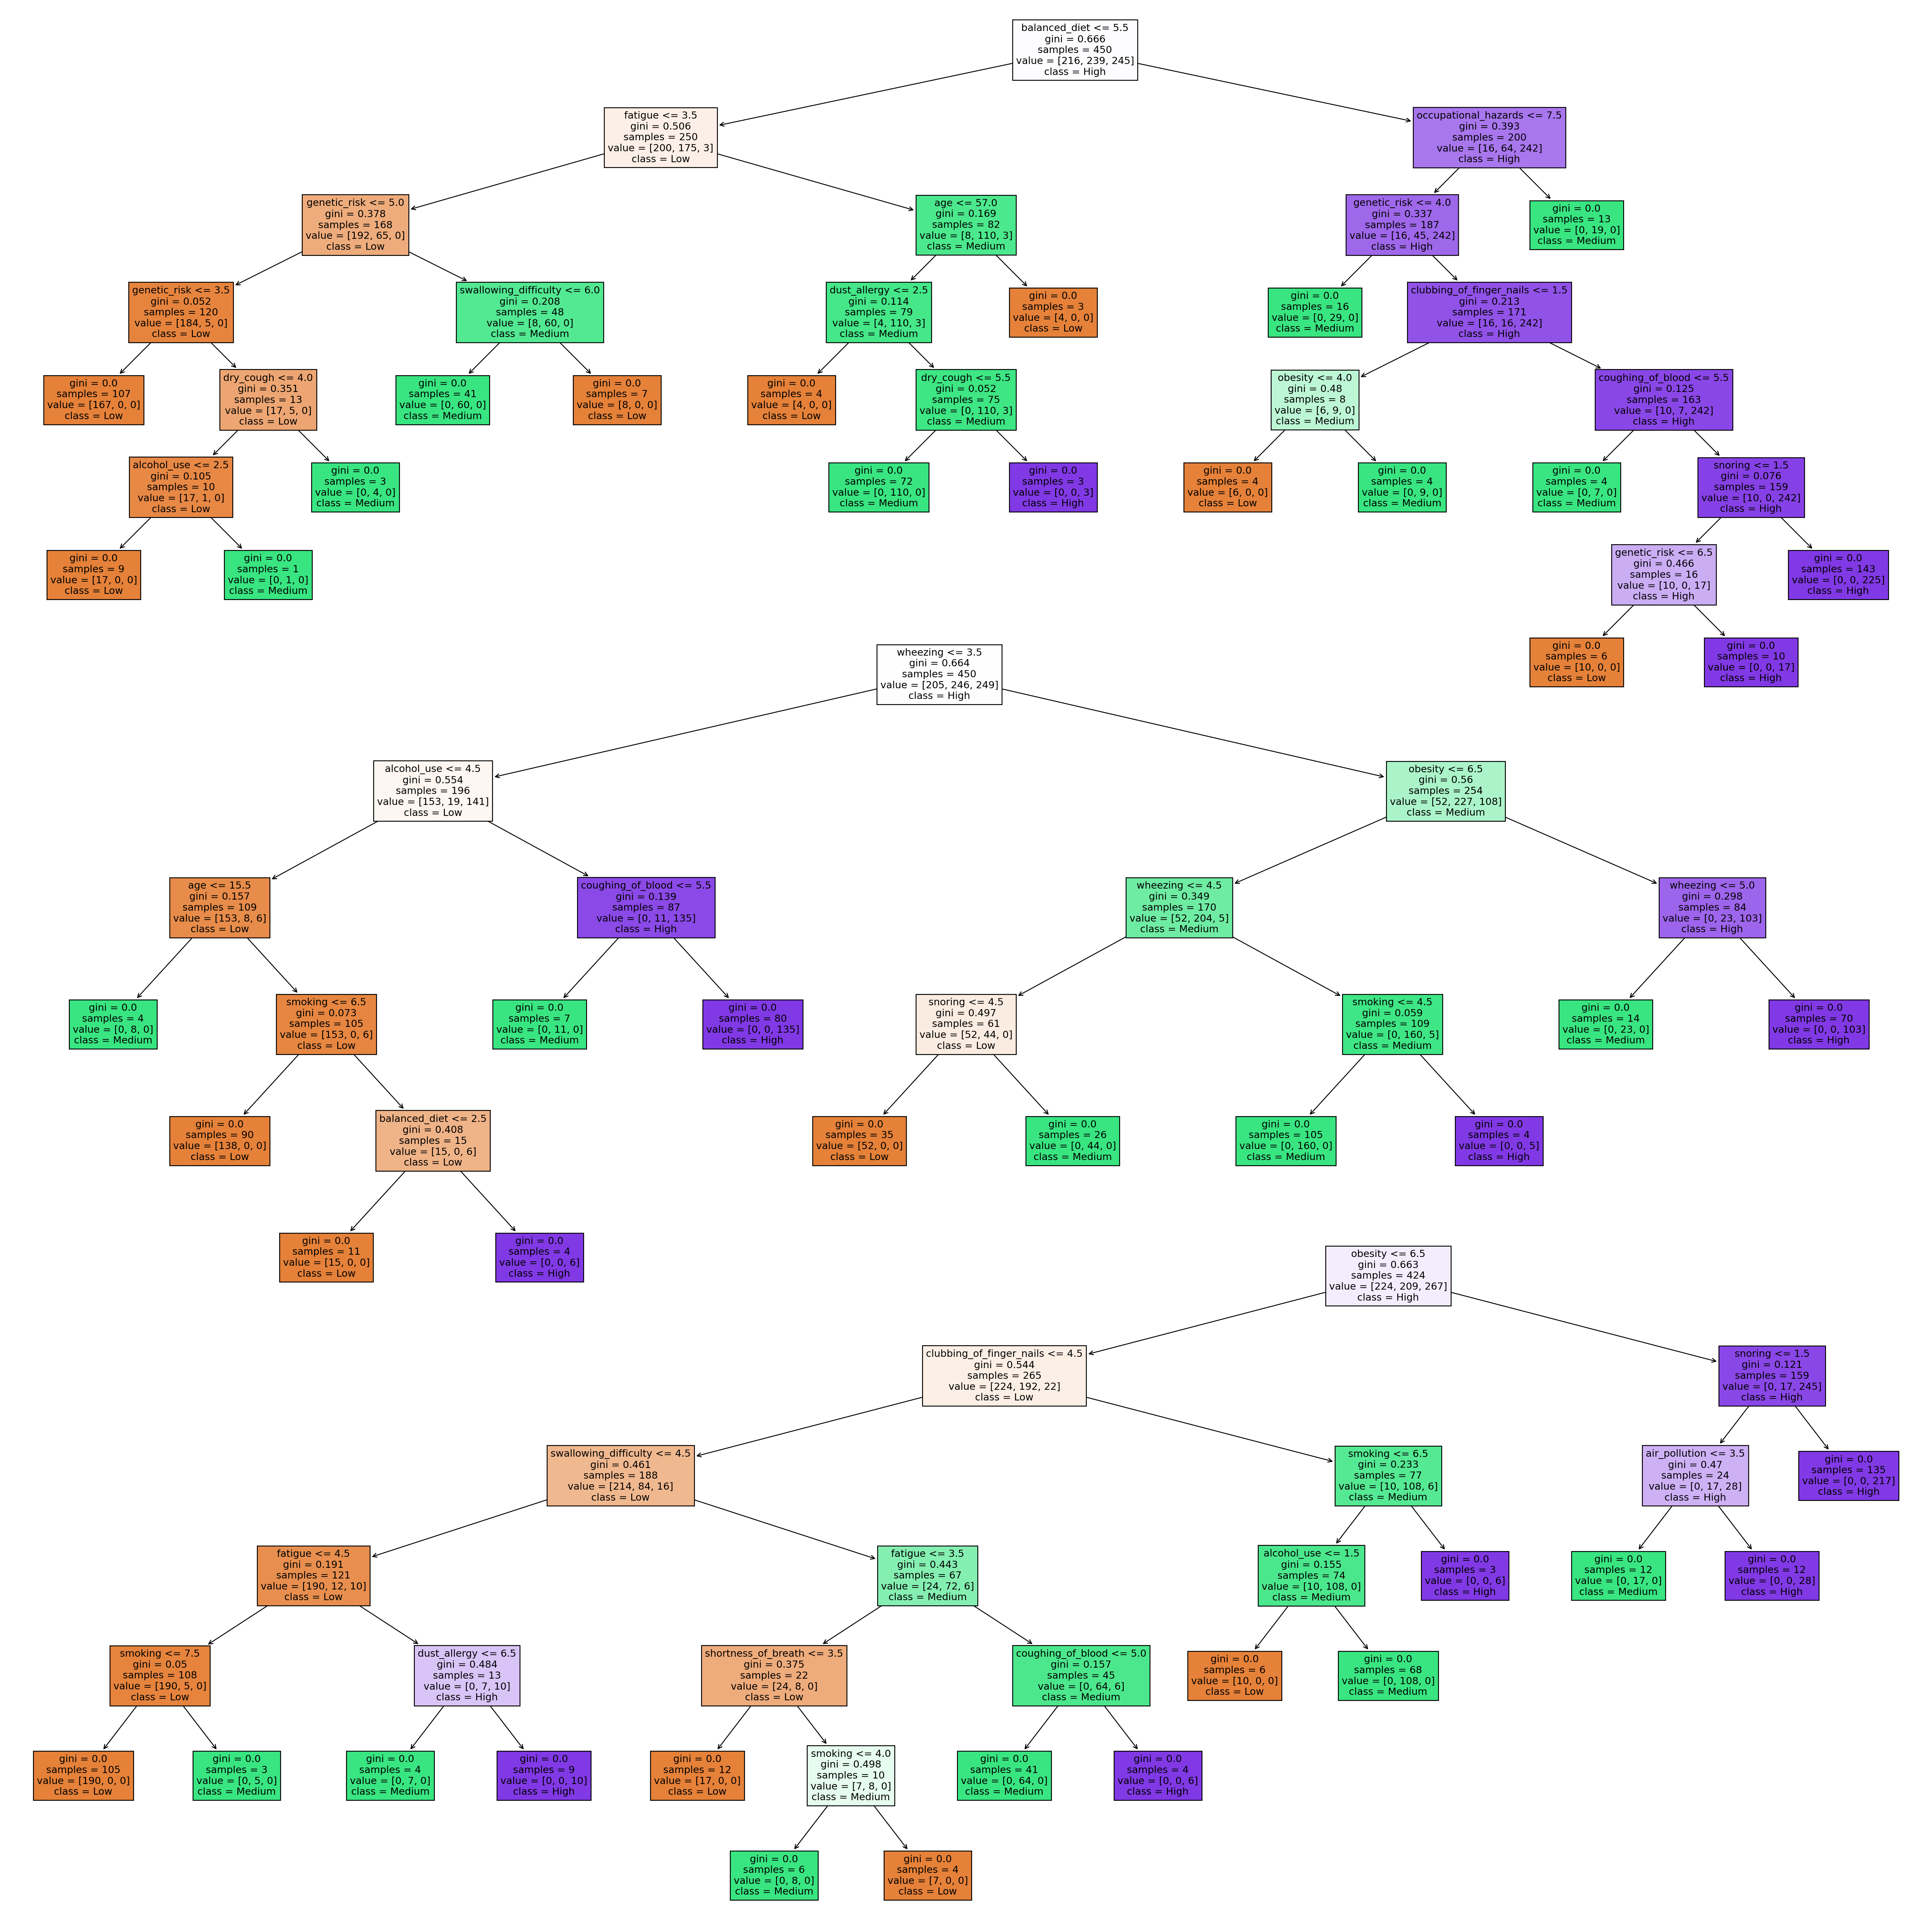

In [46]:
from sklearn import tree

trees = len(RF.estimators_)
cn = ['Low', 'Medium', 'High']

fig, ax = plt.subplots(trees, 1, figsize=(30,10*trees))

for i, forest in enumerate(RF.estimators_):
    if trees > 1:
        tree.plot_tree(forest,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11,
                       ax=ax[i])
    else:
        tree.plot_tree(forest,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11)

plt.tight_layout(h_pad=-10)
plt.show()


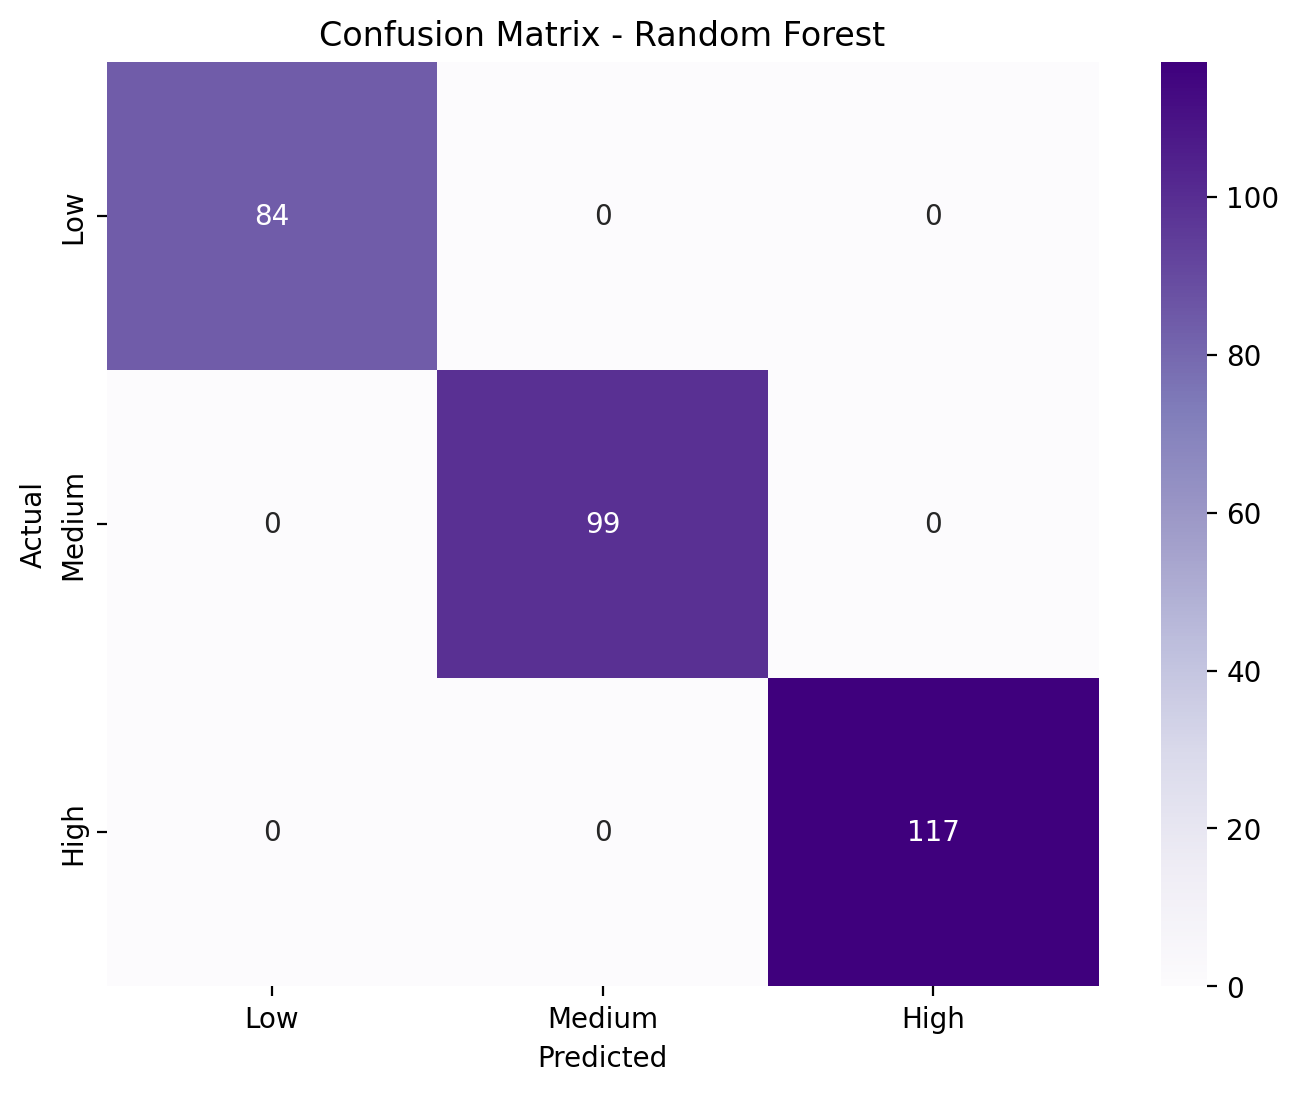

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [55]:
from sklearn.metrics import confusion_matrix

CM(y_test, RF_pred, col_names=['Low', 'Medium', 'High'], title='- Random Forest', cmap='Purples')

ml_accuracies['Random Forest'] = accuracy_score(y_test, RF_pred)
print(classification_report(y_test, RF_pred))

 Gaussian Naive Bayes

In [56]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

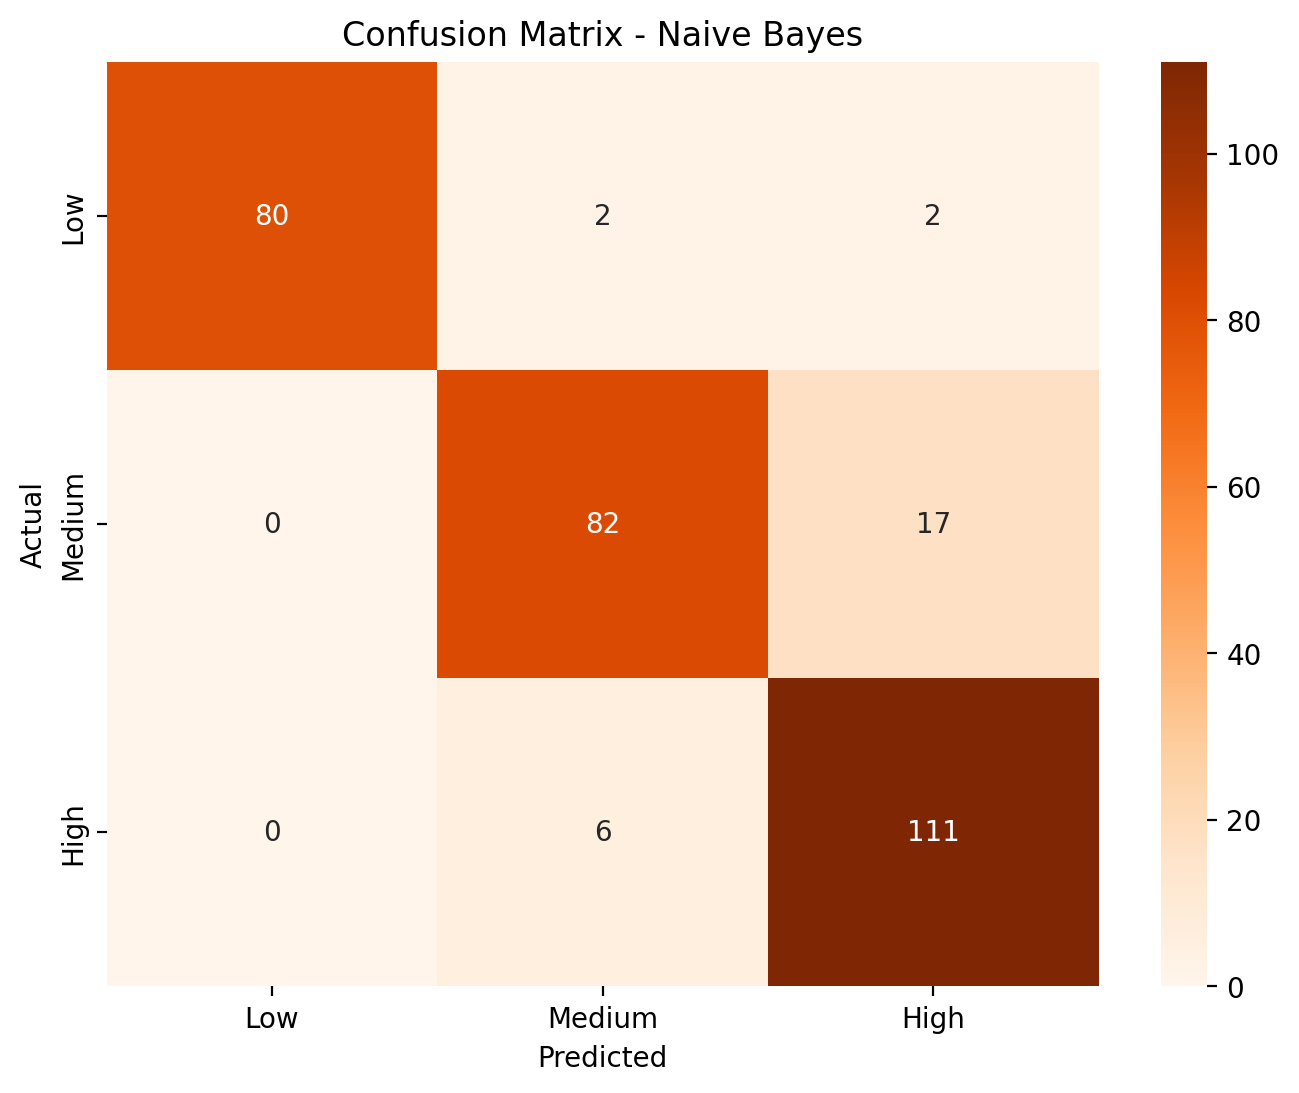

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.91      0.83      0.87        99
           2       0.85      0.95      0.90       117

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [57]:
from sklearn.metrics import confusion_matrix

CM(y_test, nb_pred, col_names=['Low', 'Medium', 'High'], title='- Naive Bayes', cmap='Oranges')

ml_accuracies['Naive Bayes'] = accuracy_score(y_test, nb_pred)
print(classification_report(y_test, nb_pred))

K-Nearest Neighbors (KNN)

In [58]:
knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

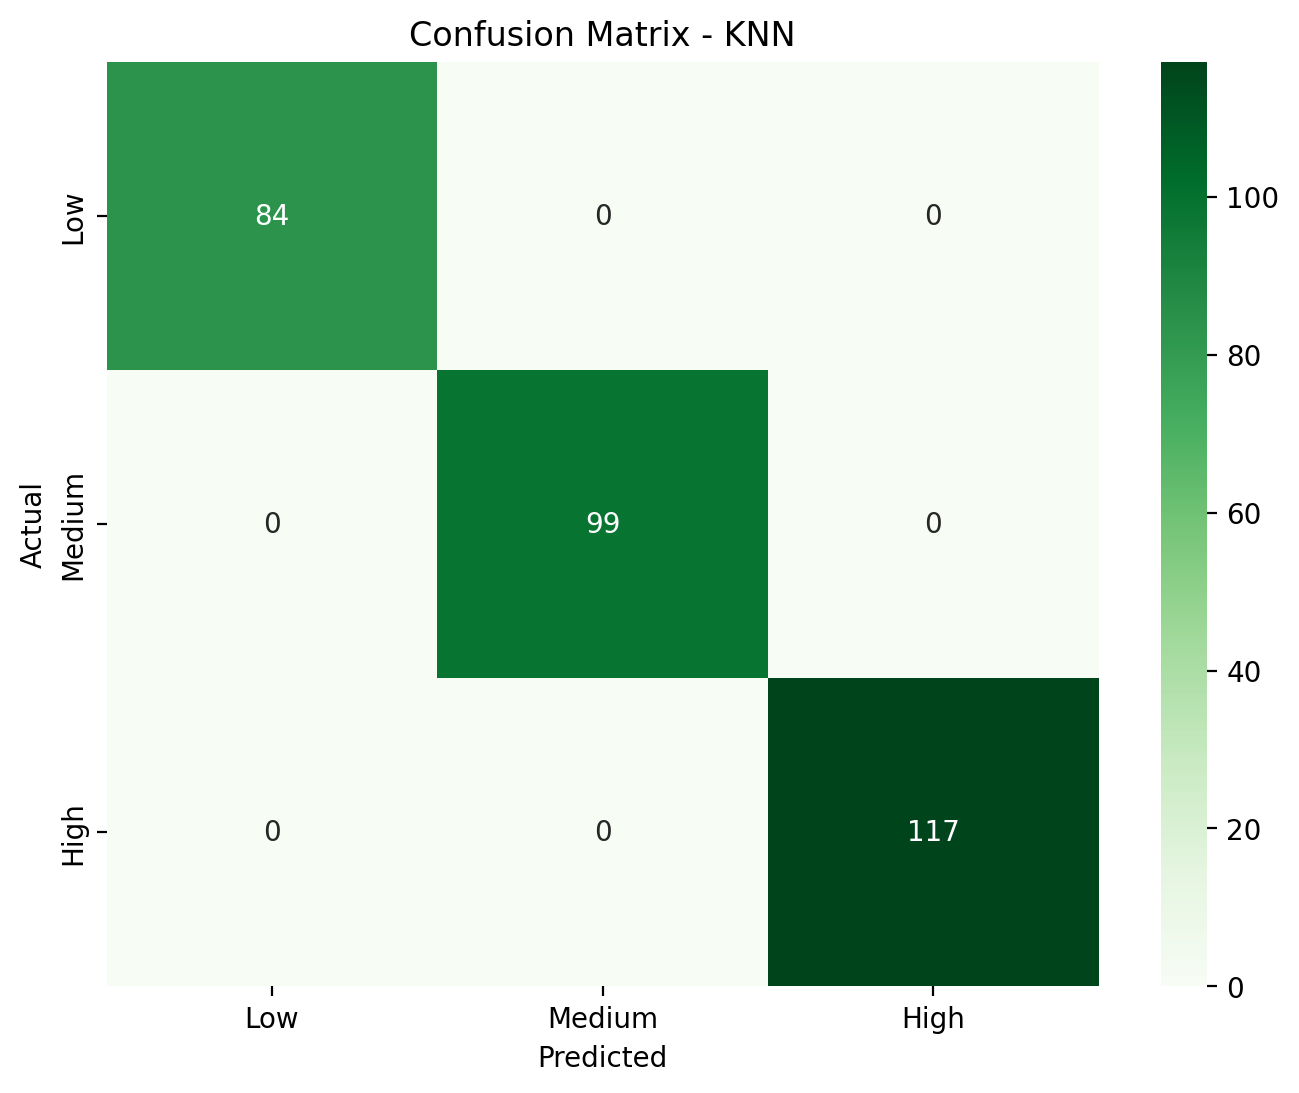

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [59]:
from sklearn.metrics import confusion_matrix

CM(y_test, knn_pred, col_names=['Low', 'Medium', 'High'], title='- KNN', cmap='Greens')

ml_accuracies['KNN'] = accuracy_score(y_test, knn_pred)
print(classification_report(y_test, knn_pred))

 Support Vector Machines

In [60]:
svm_model = SVC(C=0.5, kernel='linear')
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

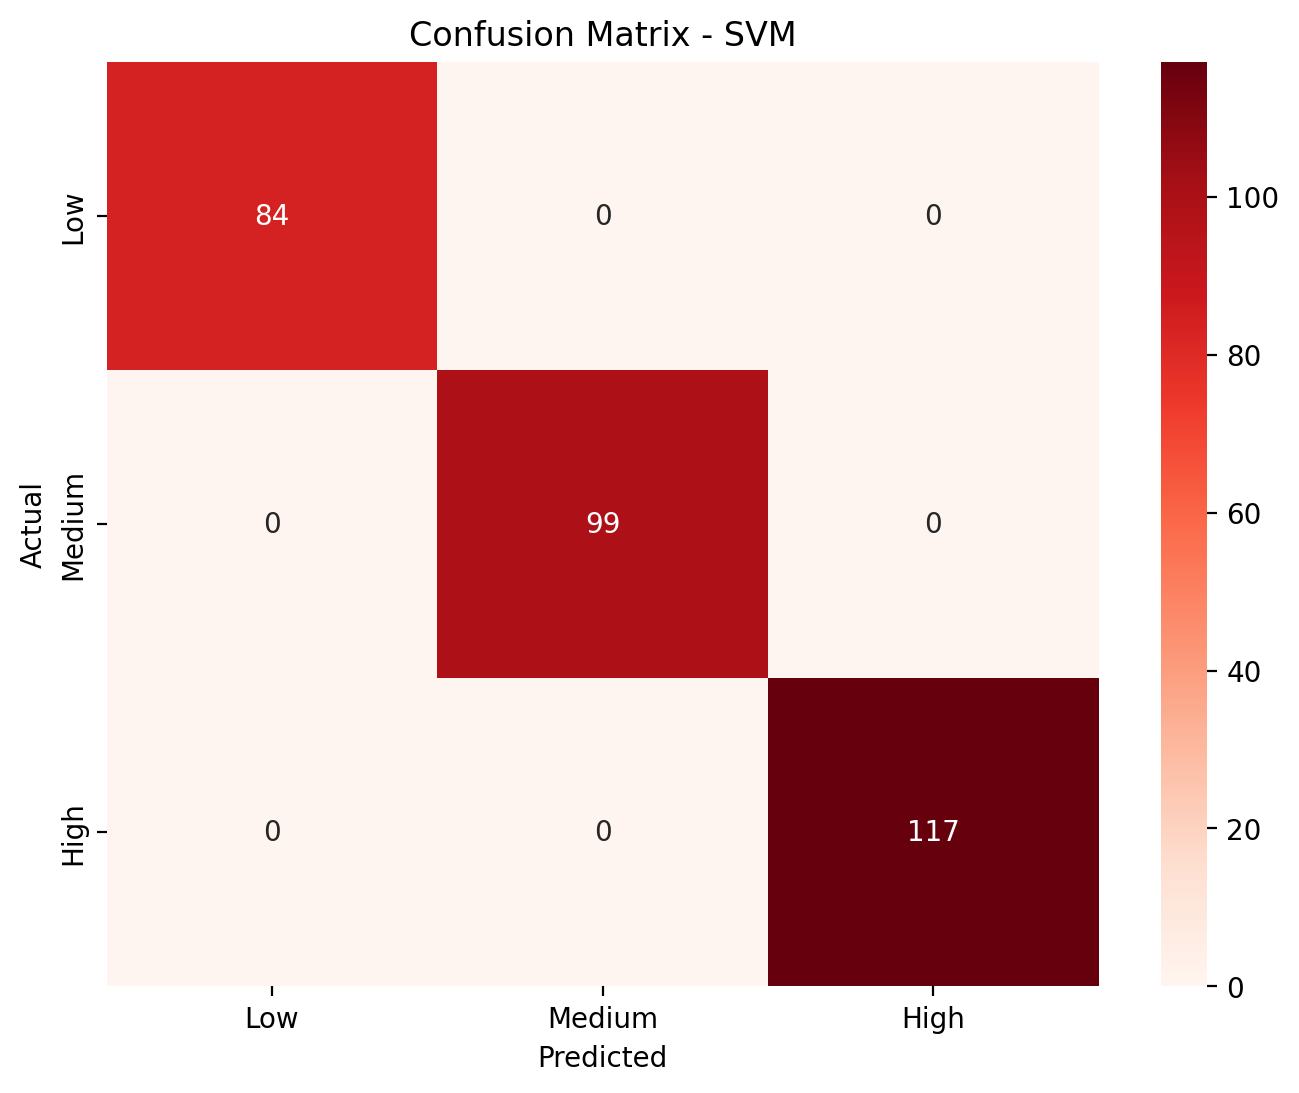

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [61]:
from sklearn.metrics import confusion_matrix

CM(y_test, svm_pred, col_names=['Low', 'Medium', 'High'], title='- SVM', cmap='Reds')

ml_accuracies['SVM'] = accuracy_score(y_test, svm_pred)
print(classification_report(y_test, svm_pred))

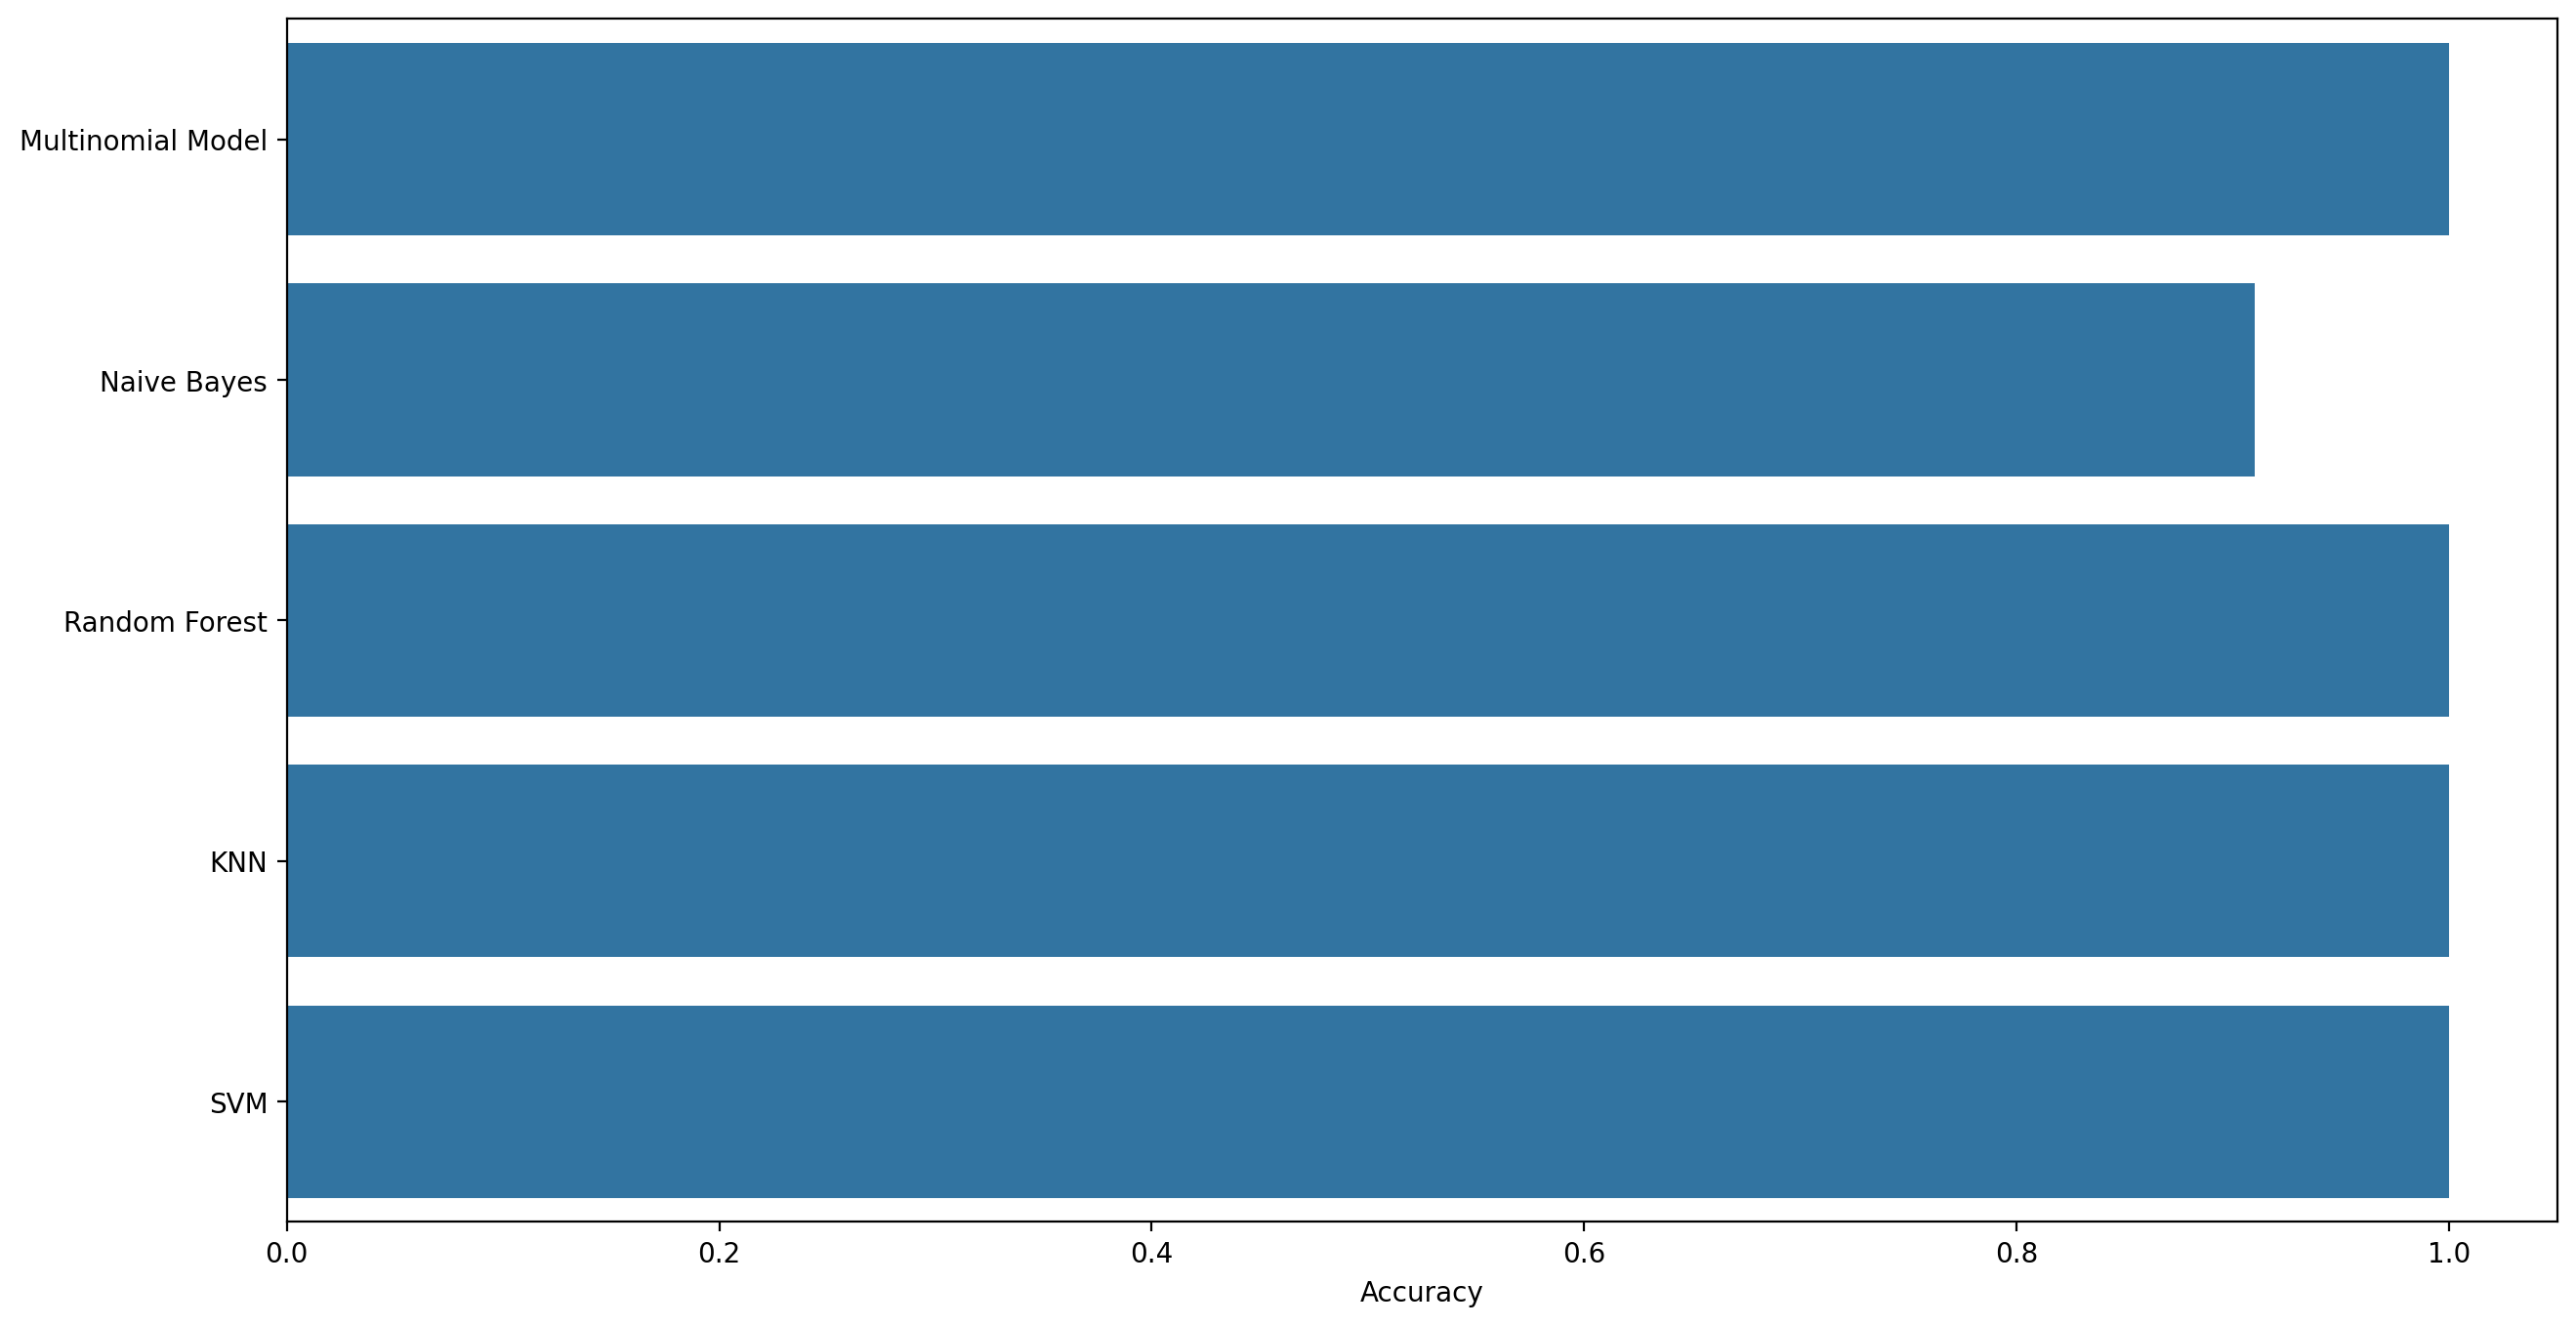

In [65]:
plt.figure(figsize=(15, 8))
sns.barplot(
    x=list(ml_accuracies.values()),
    y=list(ml_accuracies.keys()),
)
plt.xlabel('Accuracy')
plt.show()